In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.src.losses import mean_squared_error
from numba import typeof
%matplotlib inline


In [4]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


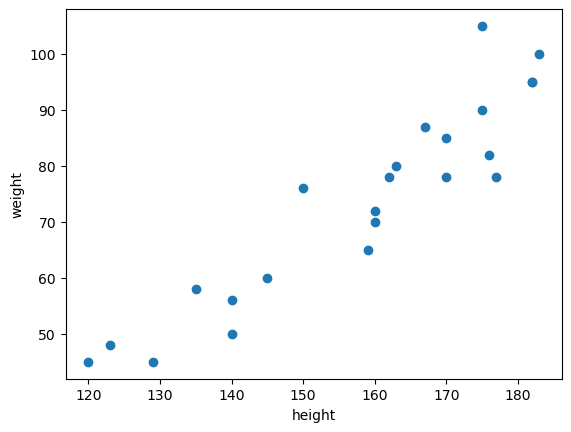

In [7]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [9]:
#Check Corrleation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


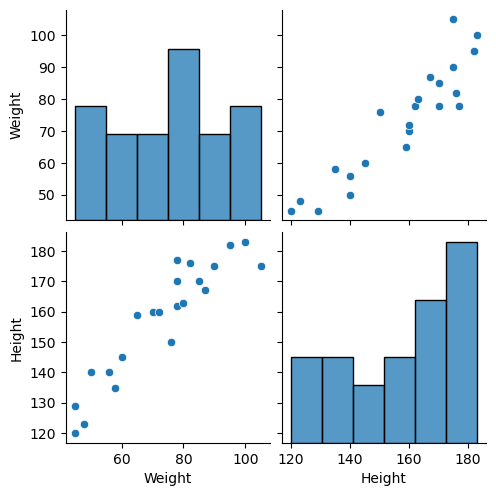

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
#dependent features and independent features
X = df[['Height']] ### independent features should be data frame or 2 dimensional array, single bracket gives series
y = df['Weight'] ### This can be in series or 1d array

In [30]:
type(X)

pandas.core.frame.DataFrame

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(18, 1)

In [37]:
y_train.shape

(18,)

In [38]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
#Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()

In [46]:
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
regressor.coef_

array([16.71556824])

In [48]:
regressor.intercept_

74.27777777777777

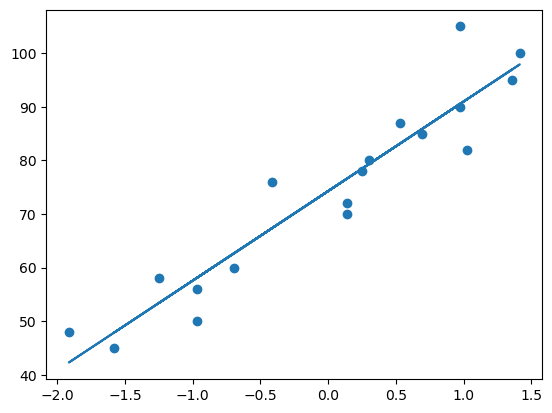

In [50]:
#Plot training data and best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))

In [52]:
#Prediction for test data
y_pred = regressor.predict(X_test)

In [53]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error (y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

20909.658665942523
143.76605244604647
144.60172428412645


In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-74.82556812424761
